# Explorando la base de datos

Se carga la base de datos y vamos a pasar los archivos .mat a mne. 

Vamos a cargar los archivos y visulaizarlos con un codigo que no utilice mne.

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import mne as mne

Unicamente abrimos un archivo

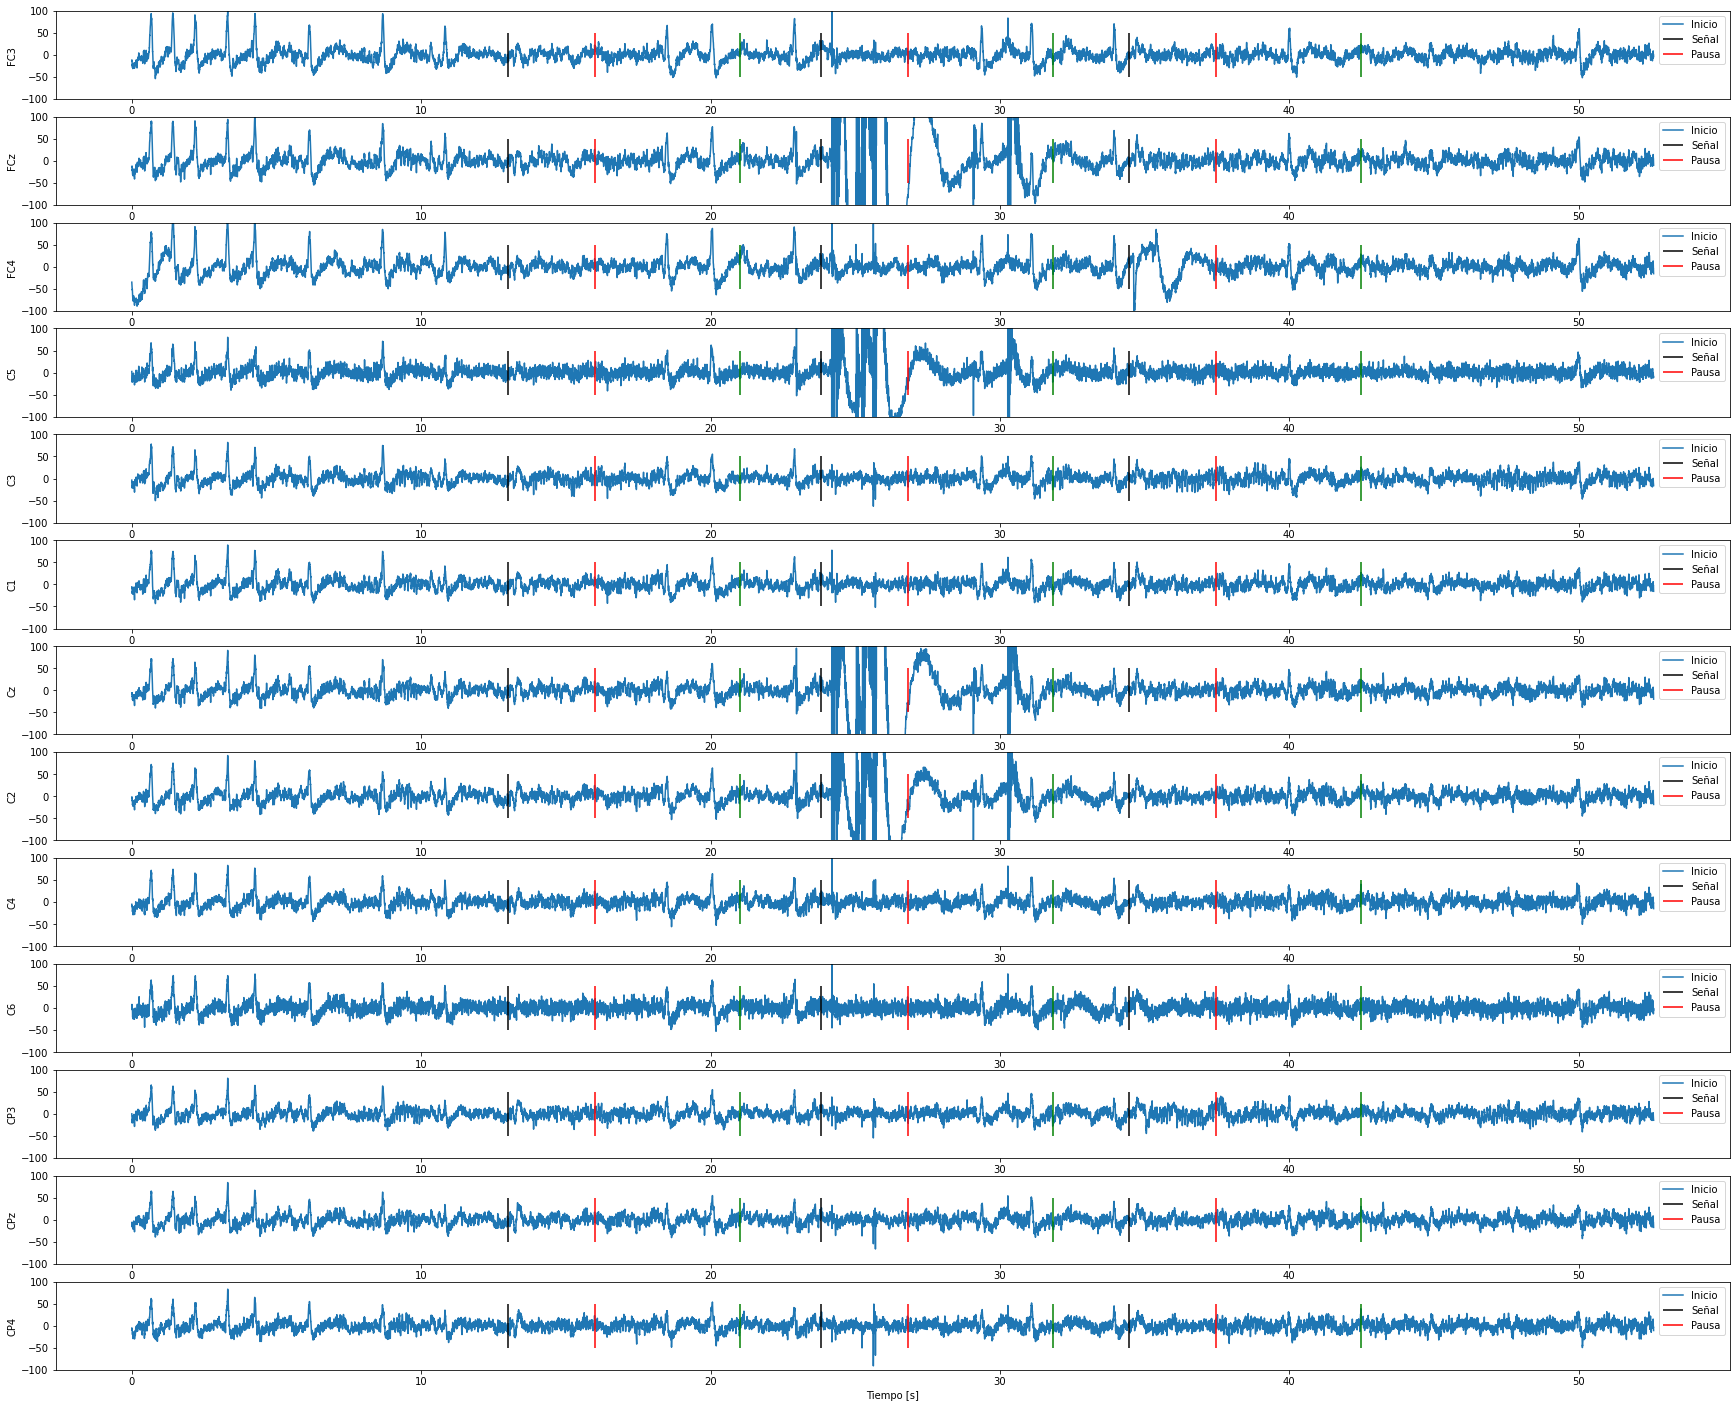

In [2]:
file_path="S01A.mat"
eeg= sio.loadmat(file_path)
# Acondicionamos los datos
micro_a_volt=1e-6
data_eeg=eeg['data']['X'][0][0]*micro_a_volt
n_frames=data_eeg.shape[0]
labels_eeg=eeg['data']['y'][0][0]
trial_eeg=eeg['data']['trial'][0][0]
fs_eeg=eeg['data']['fs'][0][0][0]
channels=["FC3",'FCz','FC4','C5','C3','C1','Cz','C2','C4','C6','CP3','CPz','CP4','STI 014']
n_channels=len(channels)
ts_eeg=1/fs_eeg

# Inicio (trial eeg)   |   Señal (3s+inicio, dura 5s)   |  Pausa  (8s+inicio)
trial_eeg_times=ts_eeg*trial_eeg
delta_cue=fs_eeg*3
delta_pause=fs_eeg*8
events_frames=np.concatenate((trial_eeg,trial_eeg+delta_cue,trial_eeg+delta_pause),axis=1)
events_times=events_frames*ts_eeg

fig, axs = plt.subplots(13,figsize=[30,25])
n_trials=int(3)
t=np.linspace(0,events_times[n_trials,2],events_frames[n_trials,2])
for i in range(13):
    axs[i].plot(t,data_eeg[0:events_frames[n_trials,2],i]/micro_a_volt)
    #axs[i].set_title(channels[i])
    axs[i].set_xlabel("Tiempo [s]")
    axs[i].set_ylabel(channels[i])
    axs[i].set_ylim([-100,100])
    axs[i].vlines(x=events_frames[0:n_trials,0]*ts_eeg,ymin=-50,ymax=50, color='black')
    axs[i].vlines(x=events_frames[0:n_trials,1]*ts_eeg,ymin=-50,ymax=50, color='red')
    axs[i].vlines(x=events_frames[0:n_trials,2]*ts_eeg, ymin=-50,ymax=50,color='green')
    axs[i].legend(['Inicio','Señal','Pausa'])
plt.show()


# Abrimos varios archivos

In [3]:
files_path=["S01A.mat","S01B.mat","S02A.mat","S02B.mat","S03A.mat","S03B.mat","S04A.mat","S04B.mat"]
eegs=[]
for i in files_path:
    eegs.append(sio.loadmat(i))

In [4]:
# Acondicionamos los datos
micro_a_volt=1e-6
datas_eegs=[]
n_frames=[]
labels_eeg=[]
trials_eeg=[]
fs_eegs=[]

for i in range(len(eegs)):
    datas_eegs.append(eegs[i]['data']['X'][0][0]*micro_a_volt)
    n_frames.append(datas_eegs[i].shape[0])
    labels_eeg.append(eegs[i]['data']['y'][0][0])
    trials_eeg.append(eegs[i]['data']['trial'][0][0])
    fs_eegs.append(eegs[i]['data']['fs'][0][0][0][0])
channels=["FC3",'FCz','FC4','C5','C3','C1','Cz','C2','C4','C6','CP3','CPz','CP4','STI 014']
n_channels=len(channels)
ts_eeg=1/fs_eegs[0]


In [5]:
# Inicio (trial eeg)   |   Señal (3s+inicio, dura 5s)   |  Pausa  (8s+inicio)
trials_eeg_times=[]
delta_cue=fs_eegs[0]*3
delta_pause=fs_eegs[0]*8
events_frames=[]
events_times=[]
for i in range(len(files_path)):
    trials_eeg_times.append(ts_eeg*trials_eeg[i])
    events_frames.append(np.concatenate((trials_eeg[i],trials_eeg[i]+delta_cue,trials_eeg[i]+delta_pause),axis=1))
    events_times.append(events_frames[i]*ts_eeg)

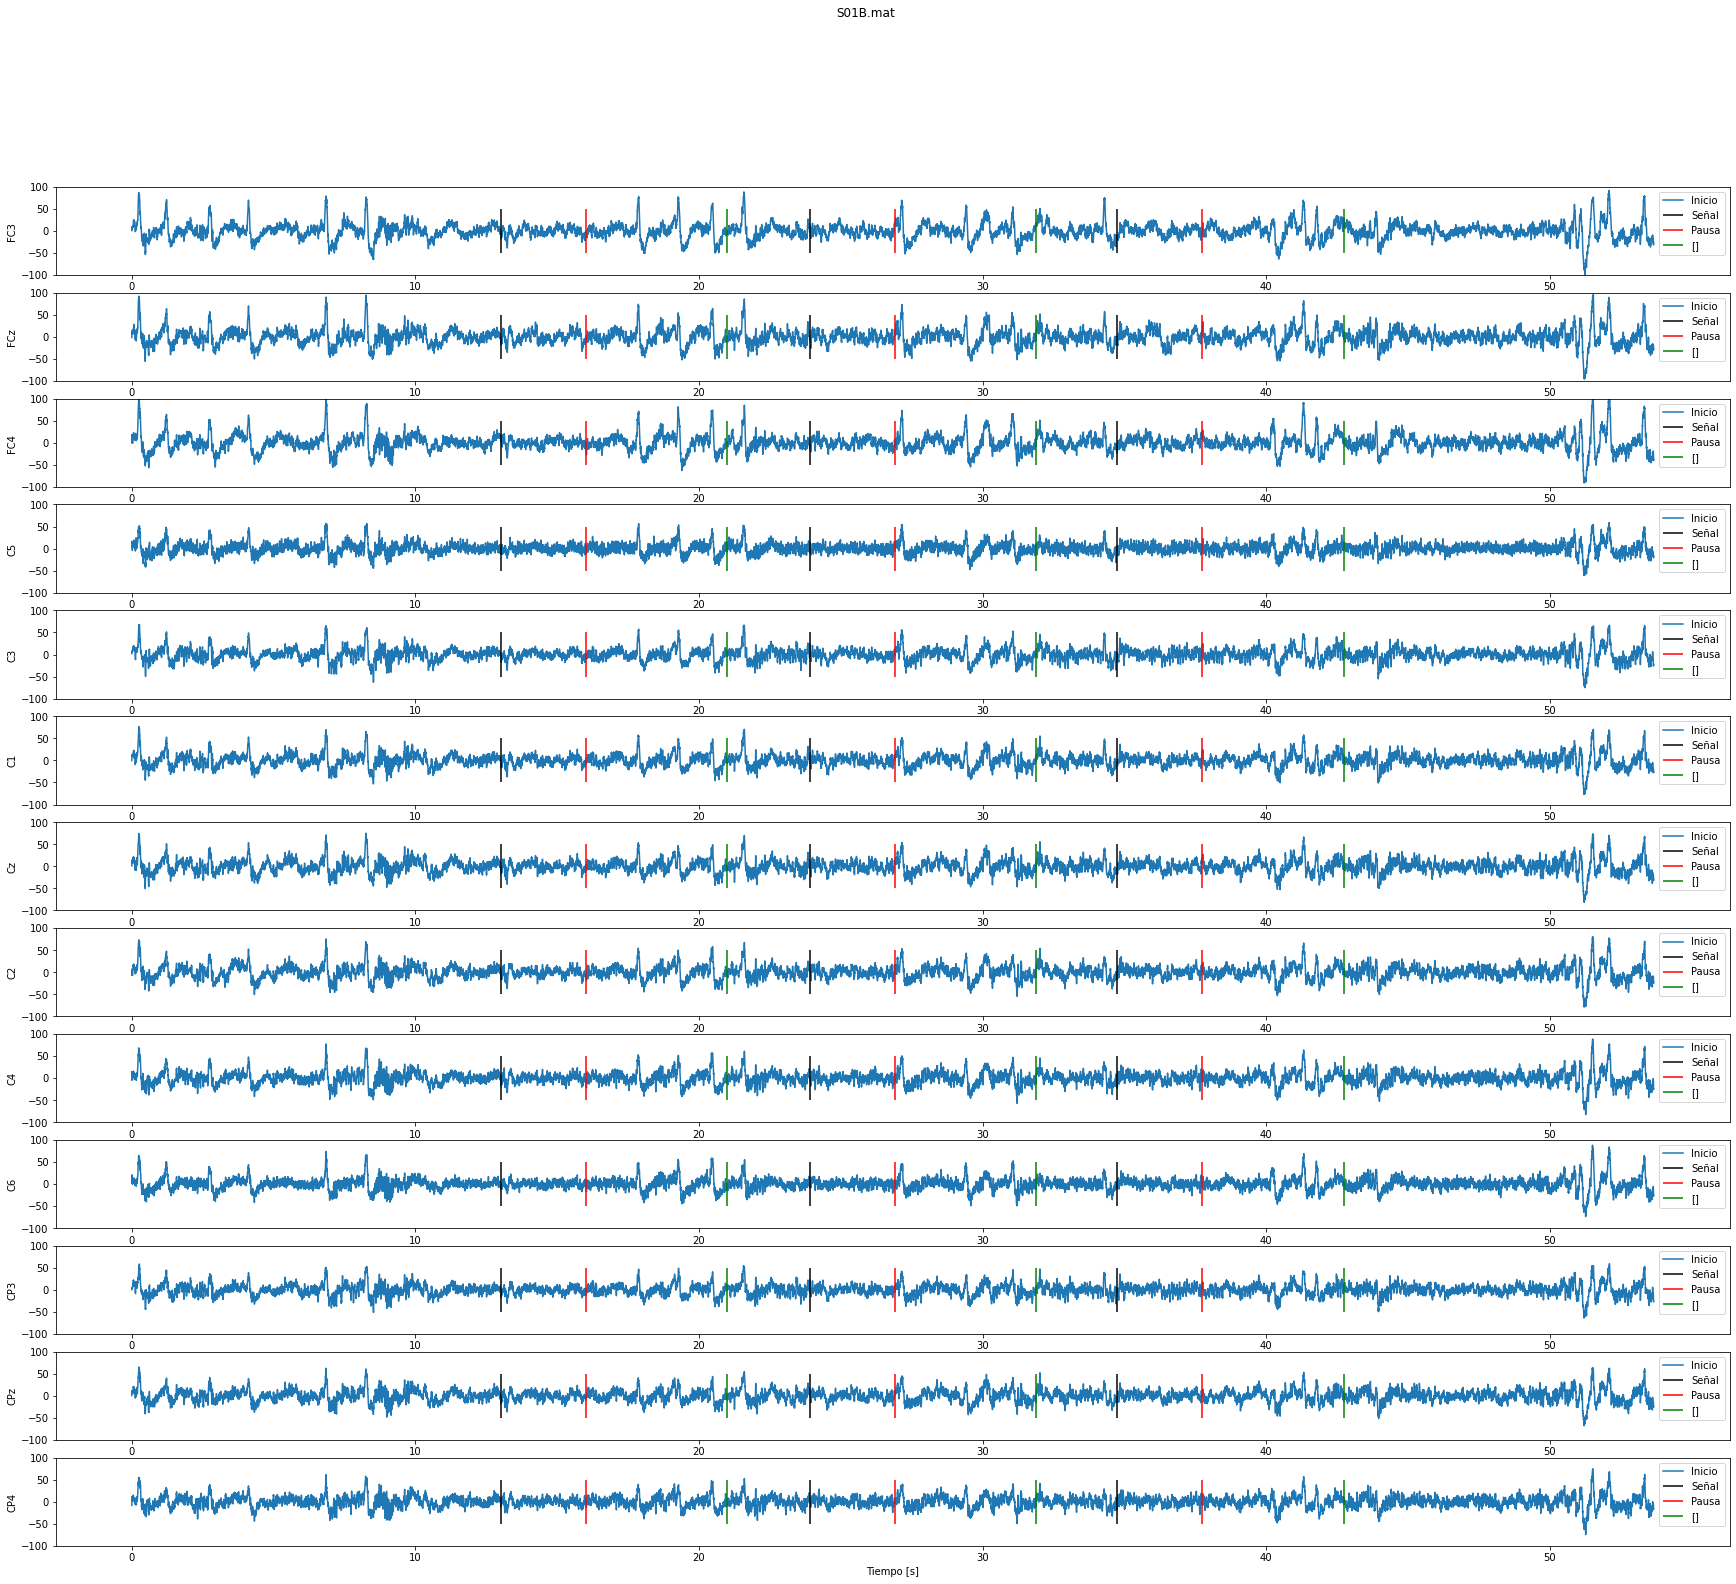

In [6]:
fig, axs = plt.subplots(13,figsize=[30,25])
n_trials=int(3)
j=1
t=np.linspace(0,events_times[j][n_trials,2],events_frames[j][n_trials,2])
for i in range(13):
    axs[i].plot(t,datas_eegs[j][0:events_frames[j][n_trials,2],i]/micro_a_volt)
    #axs[i].set_title(channels[i])
    axs[i].set_xlabel("Tiempo [s]")
    axs[i].set_ylabel(channels[i])
    axs[i].set_ylim([-100,100])
    axs[i].vlines(x=events_times[j][0:n_trials,0],ymin=-50,ymax=50, color='black')
    axs[i].vlines(x=events_times[j][0:n_trials,1],ymin=-50,ymax=50, color='red')
    axs[i].vlines(x=events_times[j][0:n_trials,2], ymin=-50,ymax=50,color='green')
    axs[i].legend(['Inicio','Señal','Pausa',[]])
plt.suptitle(files_path[j])
plt.show()


In [7]:
#%% Damos el formato a los eventos
n_trial=len(labels_eeg)
event_dict=dict(hand=1,feet=2,cue=3,p=4)
events=np.concatenate((trial_eeg,np.zeros([1,n_trial]).T,labels_eeg),axis=1)
#Vamos a agregar las señales y las pausas
events_cue=np.concatenate((trial_eeg+delta_cue,np.zeros([n_trial,1]),np.ones([n_trial,1])*3),axis=1)
events_p=np.concatenate((trial_eeg+delta_pause,np.zeros([n_trial,1]),np.ones([n_trial,1])*4),axis=1)
events_p=events_p[:-1]
events=np.concatenate((events,events_cue,events_p))
#Ordenamos los eventos por orden 
events_raw=sorted(events, key=lambda frame: frame[0])  
events_raw=np.array(events_raw)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 200 and the array at index 1 has size 8

# Creamos un objeto RAW
Para crear dicha estructura necesitamos la siguiente información : 

%data([ndarray]): [trial x channels x samples]

y ([ndarray]): [class label array [1,labels]]

sfreq([int]): [frecuencia de muestro]

even_id([dict]): [{1:'pos'}]

In [4]:
#Vamos a crear una estructura de información
info= mne.create_info(
        ch_names=channels,
        ch_types=['eeg']*(n_channels-1)+['stim'],
        sfreq=fs_eeg)
info.set_montage('standard_1020')

<Info | 8 non-empty values
 bads: []
 ch_names: FC3, FCz, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, CPz, CP4, STI 014
 chs: 13 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 16 items (3 Cardinal, 13 EEG)
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 512.0 Hz
>

No pude setearle loas frecuencias de los filtros. 

Damos el formato a los eventos para agregarlos a la estructura RAW

In [15]:
#%% Damos el formato a los eventos
labels_eeg=np.array(labels_eeg)
n_trial=len(labels_eeg)
event_dict=dict(hand=1,feet=2,cue=3,p=4)
events=np.concatenate((trial_eeg,np.zeros([n_trial,1]),labels_eeg),axis=1)
#Vamos a agregar las señales y las pausas
events_cue=np.concatenate((trial_eeg+delta_cue,np.zeros([n_trial,1]),np.ones([n_trial,1])*3),axis=1)
events_p=np.concatenate((trial_eeg+delta_pause,np.zeros([n_trial,1]),np.ones([n_trial,1])*4),axis=1)
events_p=events_p[:-1]
events=np.concatenate((events,events_cue,events_p))
#Ordenamos los eventos por orden 
events_raw=sorted(events, key=lambda frame: frame[0])  
events_raw=np.array(events_raw)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 200 and the array at index 1 has size 1

# Creamos el RAW

In [12]:
data_eeg=np.concatenate((data_eeg,np.zeros([n_frames,1])),axis=1)
data_raw=mne.io.RawArray(data_eeg.T,info)
data_raw.add_events(events_raw,stim_channel='STI 014')

TypeError: 'list' object cannot be interpreted as an integer

# Utilizamos la funcion de mne para graficar los datos

In [7]:
data_raw.plot(events=events_raw, scalings='auto', color='gray',event_color={1: 'r', 2: 'g', 3: 'b', 4: 'm'})

Using qt as 2D backend.
Opening raw-browser...


# Creamos una EPOCA


Una epoca es para un trial 0.5s despues del cue y 2 o 4 segundos despues. 

In [8]:
events_raw= mne.find_events(data_raw, stim_channel='STI 014')
epochs_raw = mne.Epochs(data_raw, events_raw, event_id=event_dict)

599 events found
Event IDs: [1 2 3 4]
Not setting metadata
599 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Closing raw-browser...
Channels marked as bad:
none


In [12]:
print(epochs_raw.event_id)

{'hand': 1, 'feet': 2, 'cue': 3, 'p': 4}


In [13]:
epochs_raw.plot(n_epochs=10)

Using data from preloaded Raw for 599 events and 359 original time points ...
0 bad epochs dropped
Using qt as 2D backend.
Opening epochs-browser...
Using data from preloaded Raw for 10 events and 359 original time points ...
Using data from preloaded Raw for 59 events and 359 original time points ...
